In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
tokenizer = Tokenizer()
data = open('100dayschallenge.txt',encoding="utf8").read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [16]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 11, 100)           167400    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 11, 300)           301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 300)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_4 (Dense)              (None, 837)               84537     
_________________________________________________________________
dense_5 (Dense)              (None, 1674)              1402812   
Total params: 2,116,349
Trainable params: 2,116,349
Non-trainable params: 0
_________________________________________________________________


In [17]:
 history = model.fit(predictors, label, epochs=200, verbose=1)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/200
3866/3866 [==============================] - 12s 3ms/step - loss: 7.3252 - acc: 0.0533
Epoch 2/200
3866/3866 [==============================] - 9s 2ms/step - loss: 6.3740 - acc: 0.0561
Epoch 3/200
3866/3866 [==============================] - 9s 2ms/step - loss: 6.2002 - acc: 0.0561
Epoch 4/200
3866/3866 [==============================] - 9s 2ms/step - loss: 6.0498 - acc: 0.0592
Epoch 5/200
3866/3866 [==============================] - 9s 2ms/step - loss: 5.9309 - acc: 0.0579
Epoch 6/200
3866/3866 [==============================] - 9s 2ms/step - loss: 5.8526 - acc: 0.0616
Epoch 7/200
3866/3866 [==============================] - 9s 2ms/step - loss: 5.8007 - acc: 0.0644
Epoch 8/200
3866/3866 [==============================] - 9s 2ms/step - loss: 5.7304 - acc: 0.0696
Epoch 9/200
3866/3866 [==============================] - 9s 2ms/step - loss: 5.6508 - acc: 0.0781
Epoch 10/200
3866/3866 [==============================] - 8s 2ms/step - loss: 5.5705 - acc: 0.0802
Epoch 11/200
3866/

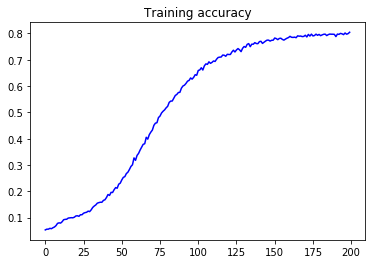

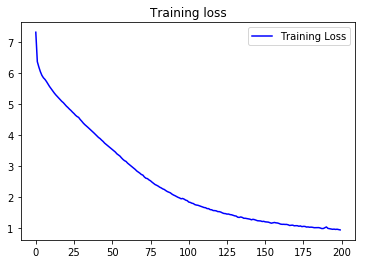

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [19]:
seed_text = "What is this life"
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

What is this life converge in a late to depart blue years day a moon in little years putting putting i was blue without my victories day a ragtag bell without day a moon to our cache years the letters snaps blue day a moon day day they were never best friends into the
